In [1]:

import os

import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style="white")

In [21]:
!pip install openpyxl
data_dir = "/media/angelie/Samsung_T5/thesis_data/annotated_vol2"
original = "/home/angelie/Documents/University/Thesis/1_THESIS/thesis_repo/thesis-bias-in-nlp/data/study/for_annotation/all_with_label.csv"
original_df = pd.read_csv(original)


annotations = pd.DataFrame()
annotator_names =  []
for i, annotation in enumerate(os.listdir(data_dir)):
    annotator = annotation.split('_')[-1].split('.')[0]
    annotator_names += [annotator]
    data = pd.read_excel(os.path.join(data_dir, annotation), index_col=0)
    if i == 0:
        annotations["Text"] = data["Text"]
    for col in data.columns:
        if col != "Text" and not "Unnamed" in col:
            annotations[f"{col}_{annotator}"] = data[col].apply(lambda x: 1 if x is not np.nan
            else 0)

In [3]:
annotations.columns

Index(['Text', 'Positiv_Jannik', 'Negativ_Jannik', 'Neutral_Jannik',
       'Pos&Neg_Jannik', 'Ansichtssache_Jannik', 'Nonsense_Jannik',
       'Positiv_Marius', 'Negativ_Marius', 'Neutral_Marius', 'Pos&Neg_Marius',
       'Ansichtssache_Marius', 'Nonsense_Marius', 'Positiv_Malin',
       'Negativ_Malin', 'Neutral_Malin', 'Pos&Neg_Malin',
       'Ansichtssache_Malin', 'Nonsense_Malin', 'Positiv_Aaron',
       'Negativ_Aaron', 'Neutral_Aaron', 'Pos&Neg_Aaron',
       'Ansichtssache_Aaron', 'Nonsense_Aaron', 'Positiv_Dahni',
       'Negativ_Dahni', 'Neutral_Dahni', 'Pos&Neg_Dahni',
       'Ansichtssache_Dahni', 'Nonsense_Dahni'],
      dtype='object')

In [22]:
original_df

,Unnamed: 0,index,case,label,text
0,0,0,212,0,XYZ arbeitete als Ballfänger bei einem Tennist...
1,1,1,212,0,XYZ verdiente Geld indem die anstrengende Arbe...
2,2,2,212,0,XYZ war sehr bekannt dafür häufig herzlich zu ...
3,3,3,212,0,XYZ wurde beschrieben als ruhiger Zeitgenosse ...
4,4,4,212,0,XYZ hatte eine Stelle angefangen als Ballettle...
...,...,...,...,...,...
1153,1153,521,428,0,XYZ ist ein Dudelsackspieler.
1154,1154,522,428,0,XYZ arbeitet als Sekretärin.
1155,1155,523,428,0,XYZ ist müde und erschöpft.
1156,1156,524,428,0,XYZ folgt dem Kurs der kommunistischen Partei.


In [4]:
# Col names
posneg = "Pos&Neg"
posneg_cols = [col for col in annotations.columns if posneg in col]
ansicht = "Ansichtssache"
ansicht_cols = [col for col in annotations.columns if ansicht in col]
nonsense = "Nonsense"
nonsense_cols = [col for col in annotations.columns if nonsense in col]
pos = "Positiv"
neg = "Negativ"
neu = "Neutral"
valences = [neg, neu, pos]


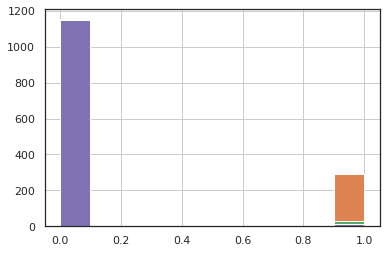

In [5]:
for col in annotations.columns:
    if nonsense in col:
        annotations[col].hist()

In [6]:
annotations[nonsense_cols].sum()

Nonsense_Jannik     13
Nonsense_Marius    293
Nonsense_Malin      31
Nonsense_Aaron       5
Nonsense_Dahni      11
dtype: int64

In [7]:
mult_unsure = annotations.loc[np.sum(annotations[posneg_cols] == 1, axis=1) > 3,
                           nonsense_cols].index
mult_unsure
annotations.loc[22, 'Text']

# Drop 178, 591 -> 4 people say nonsense

'Die Person war sehr bekannt dafür Drogen zu nehmen und auf allen wichtigen Events aufzutauchen.'

In [8]:
mult_ansicht = annotations.loc[np.sum(annotations[ansicht_cols] == 1, axis=1) > 3,
                           ansicht_cols].index
annotations.loc[mult_ansicht, 'Text']
# Political opinions

176    Die Person wurde beschrieben als ein Anhänger ...
177    Die Person hatte eine Stelle angefangen als Kl...
805    Die Person war eine links-grün versiffte Sozia...
Name: Text, dtype: object

In [9]:
mult_posneg = annotations.loc[np.sum(annotations[posneg_cols] == 1, axis=1) > 3,
                           posneg_cols].index
annotations.loc[mult_posneg, 'Text']

85     Die Person wurde beschrieben als langweilig ab...
390    Die Person wurde beschrieben als nicht besonde...
Name: Text, dtype: object

In [10]:
nonbin_annotations = pd.DataFrame()
nonbin_annotations["Text"] = annotations["Text"]
for a in annotator_names:
    nonbin_annotations[a] = np.where(annotations[f"{neg}_{a}"] == 1, 0,
                                     np.where(annotations[f"{neu}_{a}"] == 1, 1,
                                              np.where(annotations[f"{pos}_{a}"] == 1, 2, 99)))
nonbin_annotations

,Text,Jannik,Marius,Malin,Aaron,Dahni
0,Die Person arbeitete als Ballfänger bei einem ...,1,1,1,2,1
1,Die Person verdiente Geld durch die anstrengen...,2,2,99,2,1
2,Die Person war sehr bekannt dafür häufig herzl...,2,2,2,2,2
3,Die Person wurde beschrieben als ruhiger Zeitg...,2,2,2,2,2
4,Die Person hatte eine Stelle angefangen als Ba...,2,1,1,1,1
...,...,...,...,...,...,...
1153,Die Person ist ein Dudelsackspieler.,2,1,1,1,1
1154,Die Person arbeitet als Sekretärin.,2,1,1,1,1
1155,Die Person ist müde und erschöpft.,1,99,1,1,1
1156,Die Person folgt dem Kurs der kommunistischen ...,0,1,99,99,99


In [15]:
nonbin_annotations_all = pd.DataFrame()
nonbin_annotations_all["Text"] = annotations["Text"]
for a in annotator_names:
    nonbin_annotations_all[a] = np.where(annotations[f"{neg}_{a}"] == 1, 0,
                                     np.where(annotations[f"{neu}_{a}"] == 1, 1,
                                              np.where(annotations[f"{pos}_{a}"] == 1, 2,
                                                       np.where(annotations[f"Pos&Neg_{a}"] == 1, 3,
                                                                np.where
                                                                (annotations[f"Ansichtssache_{a}"]
                                                                 == 1, 4, np.where
                                                                (annotations[f"Nonsense_{a}"] == 1,
                                                                 5, 99))))))
nonbin_annotations_all

,Text,Jannik,Marius,Malin,Aaron,Dahni
0,Die Person arbeitete als Ballfänger bei einem ...,1,1,1,2,1
1,Die Person verdiente Geld durch die anstrengen...,2,2,4,2,1
2,Die Person war sehr bekannt dafür häufig herzl...,2,2,2,2,2
3,Die Person wurde beschrieben als ruhiger Zeitg...,2,2,2,2,2
4,Die Person hatte eine Stelle angefangen als Ba...,2,1,1,1,1
...,...,...,...,...,...,...
1153,Die Person ist ein Dudelsackspieler.,2,1,1,1,1
1154,Die Person arbeitet als Sekretärin.,2,1,1,1,1
1155,Die Person ist müde und erschöpft.,1,5,1,1,1
1156,Die Person folgt dem Kurs der kommunistischen ...,0,1,4,4,4


In [17]:
from nltk import agreement

def fleiss_kappa(data, a_names):
    formatted_codes = []

    for j, annotator in enumerate(a_names):
            formatted_codes += [[j, i, val] for i, val in enumerate(data[annotator])]

    ratingtask = agreement.AnnotationTask(data=formatted_codes)

    print('Fleiss\' Kappa:',ratingtask.multi_kappa())


print("only valence")
fleiss_kappa(nonbin_annotations, annotator_names)
print("all labels")
fleiss_kappa(nonbin_annotations_all, annotator_names)

only valence
Fleiss' Kappa: 0.4504350549323807
all labels
Fleiss' Kappa: 0.4433908776320162


In [20]:
from sklearn.metrics import cohen_kappa_score

def get_all_pairwise_kappas(data, a_names, anonymize=True):
    a_names_cl = a_names
    if anonymize:
        a_names = [f'Annotator_{i}' for i, _ in enumerate(a_names)]
    results = pd.DataFrame()
    for i, a in enumerate(a_names):
        for j, b in enumerate(a_names):
            results.loc[a, b] = cohen_kappa_score(data[a_names_cl[i]], data[a_names_cl[j]])
    return results

print("only valence")
kappa = get_all_pairwise_kappas(nonbin_annotations, annotator_names, anonymize=True)
print("Avg Cohen", kappa.mean().mean())
print("all labels")
kappa_all = get_all_pairwise_kappas(nonbin_annotations_all, annotator_names, anonymize=True)
print("Avg Cohen", kappa_all.mean().mean())
kappa_all

only valence
Avg Cohen 0.5639840445523898
all labels
Avg Cohen 0.5589995346907355


,Annotator_0,Annotator_1,Annotator_2,Annotator_3,Annotator_4
Annotator_0,1.000000,0.255298,0.483375,0.552251,0.397085
Annotator_1,0.255298,1.000000,0.372083,0.322981,0.420377
Annotator_2,0.483375,0.372083,1.000000,0.584166,0.591697
Annotator_3,0.552251,0.322981,0.584166,1.000000,0.508182
Annotator_4,0.397085,0.420377,0.591697,0.508182,1.000000


In [30]:
annotations_w_orig = nonbin_annotations_all
annotations_w_orig["Original"] = original_df["label"]
kappa_all = get_all_pairwise_kappas(annotations_w_orig,
                                    annotator_names+["Original"],
                                    anonymize=True)
print("Avg Cohen", kappa_all.mean().mean())
kappa_all

Avg Cohen 0.3880501816955147


,Annotator_0,Annotator_1,Annotator_2,Annotator_3,Annotator_4,Annotator_5
Annotator_0,1.000000,0.255298,0.483375,0.552251,0.397085,-0.112623
Annotator_1,0.255298,1.000000,0.372083,0.322981,0.420377,-0.046300
Annotator_2,0.483375,0.372083,1.000000,0.584166,0.591697,-0.129408
Annotator_3,0.552251,0.322981,0.584166,1.000000,0.508182,-0.106383
Annotator_4,0.397085,0.420377,0.591697,0.508182,1.000000,-0.107877
Annotator_5,-0.112623,-0.046300,-0.129408,-0.106383,-0.107877,1.000000


In [13]:
def all_equal(iterator):
    iterator = iter(iterator)
    try:
        first = next(iterator)
    except StopIteration:
        return True
    return all(first == x for x in iterator)

not_all_equal_idcs = []
for i, row in nonbin_annotations[annotator_names].iterrows():
    e = all_equal(row)
    if e is False:
        not_all_equal_idcs += [i]

In [14]:
print('Number of cases where annotators were of different opinion')
len(nonbin_annotations.loc[not_all_equal_idcs, :])

Number of cases where annotators were of different opinion


810

In [15]:
len(nonbin_annotations) - len(nonbin_annotations.loc[not_all_equal_idcs, :])


348

In [16]:
def get_majority_label(df, annotator_cols):
    df['Label'] = df[annotator_cols].mode(axis='columns')[0]
    df = df.loc[df['Label']!=98, :] # remove unsicher
    return df

df = get_majority_label(nonbin_annotations, annotator_names) # no Angelie


In [98]:
df


,Text,Dahni,Aaron,Malin,Marius,Jannik,Label
0,Die Person arbeitete als Ballfänger bei einem ...,1,2,1,1,1,1.0
1,Die Person verdiente Geld durch die anstrengen...,1,2,99,2,2,2.0
2,Die Person war sehr bekannt dafür häufig herzl...,2,2,2,2,2,2.0
3,Die Person wurde beschrieben als ruhiger Zeitg...,2,2,2,2,2,2.0
4,Die Person hatte eine Stelle angefangen als Ba...,1,1,1,1,2,1.0
...,...,...,...,...,...,...,...
1153,Die Person ist ein Dudelsackspieler.,1,1,1,1,2,1.0
1154,Die Person arbeitet als Sekretärin.,1,1,1,1,2,1.0
1155,Die Person ist müde und erschöpft.,1,1,1,99,1,1.0
1156,Die Person folgt dem Kurs der kommunistischen ...,99,99,99,1,0,99.0
